In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, t

url = "https://raw.githubusercontent.com/fabiobanyu/File_Tugas/refs/heads/main/Rata-rata%20Tekanan%20Udara%2C%202022-2023.csv"

data = pd.read_csv(url)
data

,Rata-rata Tekanan Udara (mb),Unnamed: 1,Unnamed: 2
0,Bulan,Tahun,NaN
1,NaN,2022,2023.0
2,Januari,1003.7,1001.1
3,Februari,1007.5,1001.1
4,Maret,1008,1001.8
5,April,1009.2,1000.7
6,Mei,1008.2,1001.8
7,Juni,1008.9,1001.8
8,Juli,1010.8,1002.7
9,Agustus,1006.5,1003.2


In [3]:
#Rename data
data.columns = ["Bulan", "2022", "2023"]
data["2022"] = pd.to_numeric(data["2022"], errors = 'coerce')
data["2023"] = pd.to_numeric(data["2023"], errors = 'coerce')

data = data.iloc[2:]
data = data.dropna()
data.reset_index(drop=True, inplace=True)

#Rata-rata
average_2022 = data["2022"].mean()
average_2023 = data["2023"].mean()

print("rata-rata tekanan udara tahun 2022: ", average_2022)
print("rata-rata tekanan udara tahun 2023: ", average_2023)

rata-rata tekanan udara tahun 2022:  1007.1666666666666
rata-rata tekanan udara tahun 2023:  1001.8916666666668


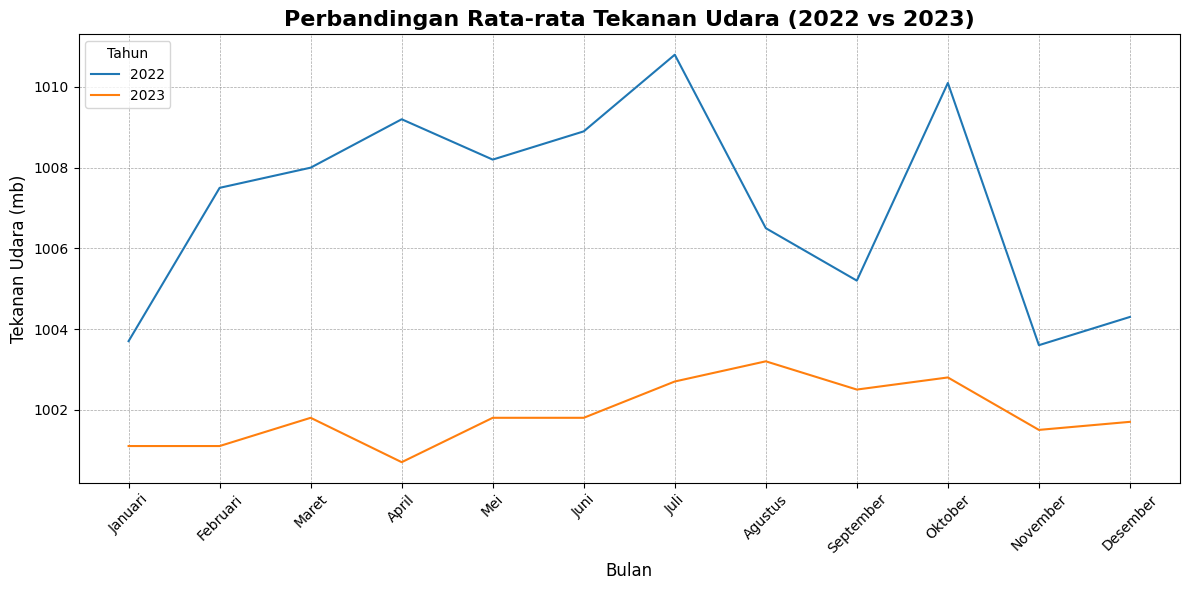

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Bulan", y="2022", label="2022")
sns.lineplot(data=data, x="Bulan", y="2023", label="2023")

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title("Perbandingan Rata-rata Tekanan Udara (2022 vs 2023)", fontsize=16, weight='bold')
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Tekanan Udara (mb)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tahun", fontsize=10, loc="upper left")
plt.tight_layout()

plt.show()

1. **Perumusan Hipotesis**
    - Hipotesis nol (𝐻0): Tidak ada perbedaan signifikan antara rata-rata tekanan udara pada tahun 2022 dan 2023 (𝜇𝑑 = 0)
    - Hipotesis alternatif (𝐻𝑎): Ada perbedaan signifikan antara rata-rata tekanan udara pada tahun 2022 dan 2023 (𝜇𝑑 ≠ 0).

2. **Taraf Nyata**
    - (𝛼) sebesar 5% atau 0.05

3. **Statistika Uji**

In [5]:
data['Selisih'] = data['2023'] - data['2022']

# Statistik deskriptif
mean_difference = data['Selisih'].mean()
std_difference = data['Selisih'].std()
n = len(data['Selisih'])
df = n - 1  # Degrees of freedom

# Manual t-value
t_manual = mean_difference / (std_difference / np.sqrt(n))

# Nilai kritis t untuk dua arah (alpha dibagi dua)
alpha = 0.05
alpha_half = alpha / 2
t_critical = t.ppf(1 - alpha_half, df)

# Uji t dengan SciPy
t_stat, p_value = ttest_rel(data['2023'], data['2022'])

# Menampilkan hasil uji
print(f"\nRata-rata selisih: {mean_difference:.4f}")
print(f"Standar deviasi selisih: {std_difference:.4f}")
print(f"Jumlah sampel: {n}")
print(f"Degrees of Freedom (df): {df}")
print(f"t-hitung: {t_manual:.4f}")
print(f"p-value (SciPy): {p_value:.4f}")
print(f"t-value kritis (dua arah, alpha = {alpha}): ±{t_critical:.4f}")

# Keputusan berdasarkan p-value dan t-value
if abs(t_manual) > t_critical or p_value < alpha:
    print("Hasil signifikan: Tolak H0. Ada perbedaan rata-rata yang signifikan antara tekanan udara tahun 2022 dan 2023.")
else:
    print("Hasil tidak signifikan: Gagal menolak H0. Tidak ada perbedaan rata-rata yang signifikan antara tekanan udara tahun 2022 dan 2023.")


Rata-rata selisih: -5.2750
Standar deviasi selisih: 2.4144
Jumlah sampel: 12
Degrees of Freedom (df): 11
t-hitung: -7.5684
p-value (SciPy): 0.0000
t-value kritis (dua arah, alpha = 0.05): ±2.2010
Hasil signifikan: Tolak H0. Ada perbedaan rata-rata yang signifikan antara tekanan udara tahun 2022 dan 2023.


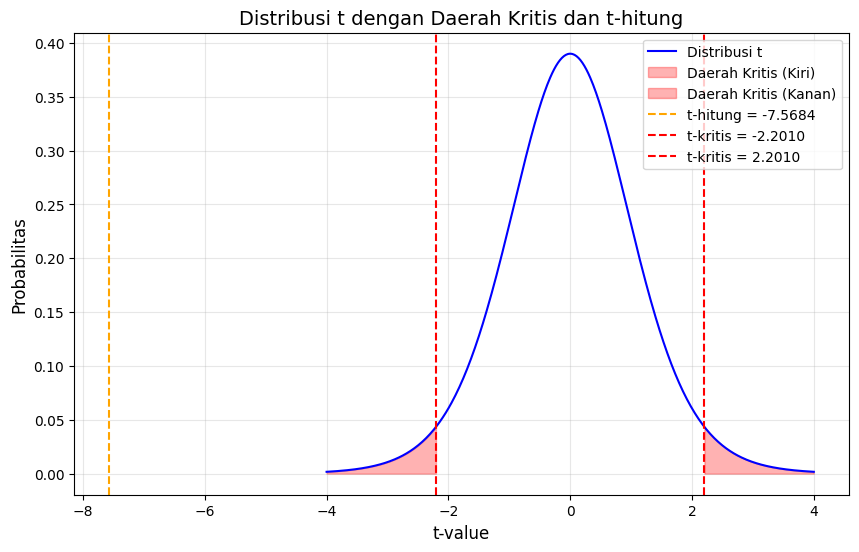

In [6]:
# Parameter distribusi
alpha = 0.05
df = 11  # Degrees of freedom
t_critical = t.ppf(1 - alpha / 2, df)  # Nilai kritis untuk dua arah
t_stat_manual = -7.5684  # t-hitung hasil perhitungan

# Membuat distribusi t
x = np.linspace(-4, 4, 500)  # Rentang distribusi
y = t.pdf(x, df)

# Plot distribusi normal
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribusi t", color="blue")

# Shading daerah kritis (dua arah)
plt.fill_between(x, 0, y, where=(x <= -t_critical), color='red', alpha=0.3, label="Daerah Kritis (Kiri)")
plt.fill_between(x, 0, y, where=(x >= t_critical), color='red', alpha=0.3, label="Daerah Kritis (Kanan)")

# Tambahkan garis untuk t-hitung
plt.axvline(x=t_stat_manual, color='orange', linestyle='--', label=f"t-hitung = {t_stat_manual:.4f}")

# Garis vertikal untuk t-krisis
plt.axvline(x=-t_critical, color='red', linestyle='--', label=f"t-kritis = {-t_critical:.4f}")
plt.axvline(x=t_critical, color='red', linestyle='--', label=f"t-kritis = {t_critical:.4f}")

# Tambahkan detail
plt.title("Distribusi t dengan Daerah Kritis dan t-hitung", fontsize=14)
plt.xlabel("t-value", fontsize=12)
plt.ylabel("Probabilitas", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Tampilkan grafik
plt.show()

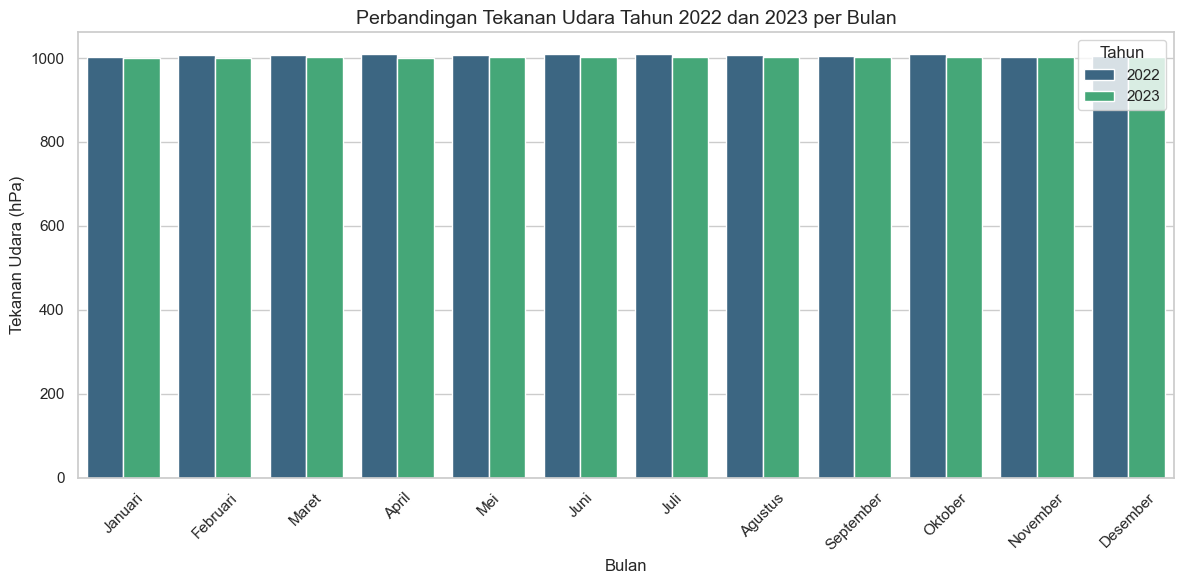

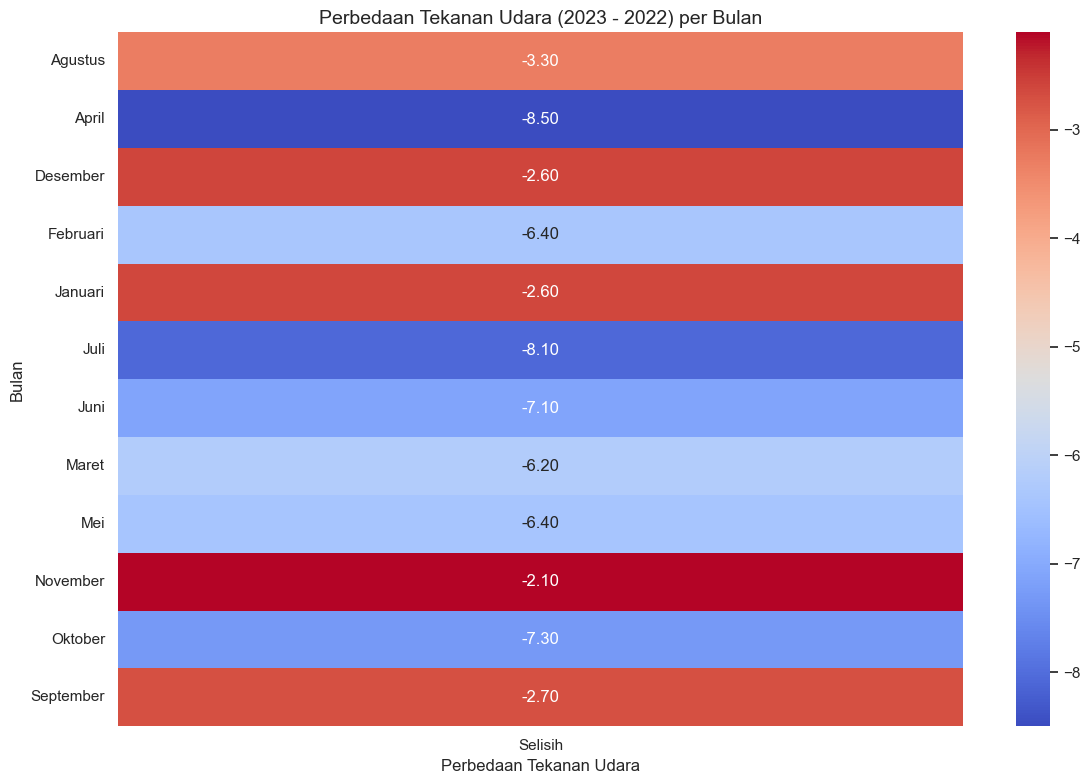

In [7]:
# Mengatur gaya visualisasi
sns.set_theme(style="whitegrid")

# Data untuk barplot
data_melt = data.melt(id_vars="Bulan", value_vars=["2022", "2023"], 
                      var_name="Tahun", value_name="Tekanan Udara")

# Membuat barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=data_melt, x="Bulan", y="Tekanan Udara", hue="Tahun", palette="viridis")
plt.title("Perbandingan Tekanan Udara Tahun 2022 dan 2023 per Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Tekanan Udara (hPa)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tahun")
plt.tight_layout()
plt.show()

#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.pivot_table(index='Bulan', values='Selisih'), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Perbedaan Tekanan Udara (2023 - 2022) per Bulan", fontsize=14)
plt.xlabel("Perbedaan Tekanan Udara", fontsize=12)
plt.ylabel("Bulan", fontsize=12)
plt.tight_layout()
plt.show()